# wrangle Act Project


## Table of Contents

- [Introduction](#intro)
- [Part I - Gathering Data](#gathering)
- [Part II - Assessing Data](#assessment)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Storing Data](#storage)
- [Part V - Analysis & Visualization](#visualization)
- [Limitations](#limitations)
- [Resources](#resources)

<a id='intro'></a>
### Introduction


This project is all about wrangling some very interesting datasets to extract value from it. Working with tweet archive [WeRateDogs](#dog_ratings) provides an opportunity to not only learn about several ways of data gathering, assessment and cleaning, but also helps get a better understanding on how twitter works!

In [1393]:
import pandas as pd
import requests 
import os
import numpy as np
import json 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>
### Part I - Gathering Data

 ##### A- Reading WeRateDogs twitter archive file via pandas csv reader

In [1394]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [1395]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


--------------------

##### B- Download tweet image predictions file using Requests library, saving it to working directory and reading it

In [1396]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [1397]:
response = requests.get(url)

In [1398]:
#writing the content of the url into a tsv file located in working directory
with open (url.split('/')[-1],
           mode='wb') as file:
    file.write(response.content)

In [1399]:
#Reading tsv file using pandas. setting delimeter to \tab
predictions = pd.read_csv(url.split('/')[-1], sep='\t')

In [1400]:
predictions.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


-------------------

##### C- Read JSON file contents (I used the txt file)

- Below is the python code copied from twitter-api.py (I commented it out)
    - I prefer not to use a twitter developer account so I decided to use txt file given by Udacity. I uploaded txt file and read it below

In [1401]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv

# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [1402]:
tweet_json = pd.DataFrame(columns=['tweet_id',
                                      'retweet_count', 
                                      'favorite_count'])

with open('tweet-json.txt') as json_file:
    for line in json_file:
        line = json.loads(line)
        tweet_json = tweet_json.append({'tweet_id': line['id'], 
                                             'retweet_count': line['retweet_count'],
                                              'favorite_count': line['favorite_count'],
                                             }, ignore_index=True)
        


In [1403]:
tweet_json.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


<a id='assessment'></a>
### Part II - Assessing Data
 

- In this section, I'll make visual and programmatic assessment for the three tables.     
  
  **Important note:** Since it's good coding practice to comment along the way, I will place comments sometimes below a certain code cells. **However** I will still make a summary for main cleaning points at the end of the section

- Will start with visual assessment for tables

In [1404]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


*Some dog names seems mistakenly extracted. Names such as **a/ an/ the** doesn't seem right*  
*It also seems useless to have **4 columns** for dog stage doggo/floofer/pupper/puppo when each entry ideally would have one stage!*

In [1405]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


*Predicted names doesn't adhere to a single scheme. Some names are* ***lowercased, capitalized, hyphenated, use underscore, etc.*** 

In [1406]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


- **Next**, will do some general programmatic assessment

In [1407]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*I see some missing **expanded_urls** entries*  
*Also entries with **retweeted_status_id** and **in_reply_to_user_id** are essentially non-unique tweets*

In [1408]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1409]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


*`tweet_json` table has 2 less entries than `archive` one, while `predictions` table has even less rows than both*

In [1410]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

*With number of unique **tweet_id** = number of rows, there are no duplicate entries*  
*More than one **rating_denominator** value which seems strange*  


In [1411]:
predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

*Some **jpg_url** entries are not unique!!*

In [1412]:
tweet_json.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

*No duplicate rows*

In [1413]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**rating_denominator** max value is 170 and min value 0,neither of these seem right

In [1414]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**p1_conf** has higher values (higher confidence level) in general than **p2_conf** which, in turn is higher than **p3_conf***. *This seems Ok*

- Next, will discover the nominator/denominator issue further

In [1415]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1416]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1417]:
#will first make the column width to fit the text, then will revert back to normal width afterwards. 
#It's important to reset width to original value afterwards, otherwise, dataframe view will look skewed    
pd.set_option('display.max_colwidth', 1)
print(archive[archive.rating_denominator >10].text)

pd.options.display.max_colwidth = 50

342     @docmisterio account started on 11/15/15                                                                                                          
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…      
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds

*With quick url check, it seems there are many factors that may contribute to these ratings:*  
- One is having **multiple dogs**(of one or more breeds in the same picture).
- Two, having a **non-dog** picture such as snoop-dog
- Three, misinterpreting a date for a rating or having multiple ratings in one comment

One thing I realised is that the dog stage columns (doggo/puppo/etc) doesn't always have a single entry per row. will double check this

In [1418]:
archive[(archive.doggo == 'doggo') & 
           ((archive.puppo != 'None') | 
            (archive.floofer != 'None') |
            (archive.pupper != 'None'))
          ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [1419]:
archive[(archive.puppo == 'puppo') & 
           ((archive.floofer != 'None') |
            (archive.pupper != 'None'))
          ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1420]:
archive[(archive.floofer != 'None') & 
            (archive.pupper != 'None')
          ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


*Seems that some entries have 2 stages. a **doggo** plus another stage!*

-------------------

#### Cleaning points

#### *Quality* 
**`Archive`** table   
- Some of the entries has more than one dog stage (i.e. floofer & doggo, pupper & doggo, etc)
- Some invalid entries exists in name column. i.e. a/an/the, etc.
- Several retweet entries found holding duplicate information.
- Several tweet replies doesn't hold unique information
- Expanded URLs has missing entries
- Multiple columns have erroneous datatypes


**`Predictions`** table  
- Duplicate image urls found which indicates duplicate ratings
- Rating_denominator column has some invalid entries (base should be 10)
- Inconsistent naming scheme for predicted dog breeds 


 **`tweet_json`** table  
- All three tables has different number of entries.



#### *Tidiness*:
- 4 columns for dog stage in `Archive` to be  melted into a single column
- Text column in `Archive` has both text and URL
- Three tables to be joined into a single one.

<a id='cleaning'></a>
### Part III - Cleaning Data

In [1421]:
#Create a copy of each table
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_json_clean = tweet_json.copy()

##### For the cleaning part, the plan will be as follows:
- Since all tables will be joined together, will start by **Tidiness** part as it will be a  good basis for further cleaning.
- After resolving messy data, will start cleaning **Quality** issues where I'll first deal with mainpulating missing/duplicate data then will work on more complicated issues.



 <font color='red'>However</font> 
*there is a **single quality issue** that I'll start fixing before any tidiness issues. This is because not fixing it now may lead to adding more redundant entries.*  


**Issue-1**      
Some of the entries has more than one dog stage (i.e. floofer & doggo, pupper & doggo, etc.)


***Define***   
For entries with more than one dog stage, keep only one stage and remove the others

***Code***
- First, will count the values of each dog stage(to compare later)

In [1422]:
print(archive_clean.doggo.value_counts())  
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


- Next, will examine the specific entries with more than one dog stage (doggo plus another stage)

In [1423]:
multiple_stages= archive_clean[(archive_clean.doggo == 'doggo') & 
           ((archive_clean.puppo != 'None') | 
            (archive_clean.floofer != 'None') |
            (archive_clean.pupper != 'None'))
          ]


In [1424]:
pd.set_option('display.max_colwidth', 1)
print(multiple_stages.text) #examine entries with multiple dog stages
pd.options.display.max_colwidth = 50

191     Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel      
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
565     Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https:

**Findings**
- Most of the text that mention 2 stages(a doggo and another stage, i.e. floofer, pupper, etc), technically refer to the other stage as the actual one.

- In rare cases, there are 2 dogs in a single picture: An adult dog (doggo) and smaller dog (at another stage).
    - Even for these entries, I will change doggo column to 'None' and keep the other stage. Anyhow, the name doggo is more generic than floofer, pupper, etc. So it makes sense to remove it.   
  
 
**Action**: remove doggo stage and leave the other stage

In [1425]:
stages_index = multiple_stages.index #an index list with the entries to change doggo
archive_clean.at[stages_index,'doggo'] = 'None'

***Test***

In [1426]:
print(archive_clean.doggo.value_counts()) 
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

None     2273
doggo      83
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


- It seems that 14 of doggo entries were successfully converted to **None** while all other stages remain intact

In [1427]:
archive_clean[(archive_clean.doggo == 'doggo') & 
           ((archive_clean.puppo != 'None') | 
            (archive_clean.floofer != 'None') |
            (archive_clean.pupper != 'None'))
          ] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


***Returned nothing as expected! Issue resolved*** Will start fixing Tidiness issues now

--------------------------

#### <font color='blue'> A- Tidiness issues</font> 


**Issue-2:**  
4 columns used to present dog stage in `Archive` table

***Define***   
Use melt function to re-organize data  in **doggo, floofer, pupper, and puppo** columns and present it in a single **stage** column to make it more computer  friendly and easier for analysis.  


***Code***   


In [1428]:
archive_clean = archive_clean.melt(id_vars=['tweet_id', 'in_reply_to_status_id','timestamp','source', 
                    'text', 'retweeted_status_id','retweeted_status_user_id', 
                    'retweeted_status_timestamp', 'expanded_urls',
                    'rating_numerator', 'rating_denominator', 'name'], 
          value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
          value_name = 'dog_stage'
          
          )
       
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,variable,dog_stage
2435,877556246731214848,NaN,2017-06-21 15:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,floofer,None
9231,669375718304980992,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,puppo,None
3511,724983749226668032,NaN,2016-04-26 15:29:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fred-Rick. He dabbles in parkour. The ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724983749...,12,10,Fred,floofer,None


- **variable** column is redundant. will remove it

In [1429]:
archive_clean.drop('variable', axis=1, inplace=True)

In [1430]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 13 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
dog_stage                     9424 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 957.2+ KB


- Entries have **quadripled** due to melting 4 columns into 1.   
Will need to remove duplicate columns using tweet_id and dog_stage as subset columns to identify duplicates. This is important to not lose required dog_stage data.

In [1431]:
archive_clean = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage'])

In [1432]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 8151
Data columns (total 13 columns):
tweet_id                      2736 non-null int64
in_reply_to_status_id         86 non-null float64
timestamp                     2736 non-null object
source                        2736 non-null object
text                          2736 non-null object
retweeted_status_id           217 non-null float64
retweeted_status_user_id      217 non-null float64
retweeted_status_timestamp    217 non-null object
expanded_urls                 2671 non-null object
rating_numerator              2736 non-null int64
rating_denominator            2736 non-null int64
name                          2736 non-null object
dog_stage                     2736 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 299.2+ KB


- It seems that there are several duplicates left. I suspect these are **duplicate None values**. If this is true, the number of duplicates "Nones" should equal the number entries with known dog stage

In [1433]:
duplicated_stages = archive_clean[archive_clean.tweet_id.duplicated(keep=False)] 
#'None' entries should equal the sum of all others combined.
duplicated_stages.dog_stage.value_counts()

None       380
pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

- Next, we need to extract the Index of **None** values to remove from archive

In [1434]:
none_index = duplicated_stages[duplicated_stages.dog_stage == "None"].index

- Then, will drop these values from archive_clean

In [1435]:
archive_clean = archive_clean.drop(none_index)

***Test***   


In [1436]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 257.7+ KB


In [1437]:
archive_clean.nunique()

tweet_id                      2356
in_reply_to_status_id           77
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
dog_stage                        5
dtype: int64

*Results show that there are 2356 unique tweet_id similar to original df*

In [1438]:
archive_clean.dog_stage.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

*Also, number of dogs in each stage looks right. All good!*

----------------

**Issue-3:**  
Text column in `Archive` has both tweet text and URL information

***Define***   
use str.split() to split **text** column  into two columns: One for tweet text and another for tweet URL (short version URL). 

- The space " " filter was a bit problematic as there are some urls in new line, etc. so will filter for **"https://"**

In [1439]:
archive_clean['short_urls'] = archive_clean.text.str.split("https://").str[-1]
archive_clean.short_urls[25:35]

27                                      t.co/ISvKOSkd5b
28                                      t.co/BCoWue0abA
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...
31                                      t.co/xZDA9Qsq1O
32                                      t.co/WxwJmvjfxo
33                                      t.co/BuveP0uMF1
34                                      t.co/tp1kQ8i9JF
35                                      t.co/gzLHboL7Sk
36                                      t.co/SATN4If5H5
37                                      t.co/44ItaMubBf
Name: short_urls, dtype: object

- *Some entries doesn't show urls, will check these next*

In [1440]:
pd.set_option('display.max_colwidth', 1)
print(archive_clean[archive_clean.short_urls <'t.co'].short_urls)
len(archive_clean[archive_clean.short_urls <'t.co'].short_urls)
pd.options.display.max_colwidth = 50

30      @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                            
55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                          
64      @RealKentMurphy 14/10 confirmed                                                                                                                                      
73      RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…                       
101     RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…                         
113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                              

- These entries either have no urls or invalid ones. will change these to None
- First, will re-add **https://** to all entries.

In [1441]:
archive_clean.short_urls = 'https://' + archive_clean.short_urls

We can use 'https://t.co' filter to locate the indices of missing URL entries then convert them *None*

In [1442]:
missing_urls = archive_clean[archive_clean.short_urls < 'https://t.co'].index
archive_clean.at[missing_urls,'short_urls'] = "None" 

In [1443]:
archive_clean['text'] = archive_clean.text.str.split("https://").str[0]

***Test***

- Perfomr URL random check 

In [1444]:
archive_clean.short_urls[50:70]

55                       None
57    https://t.co/cgwJwowTMC
58    https://t.co/D0wb1GlKAt
59    https://t.co/WiAMbTkDPf
60    https://t.co/4VsFysDmiw
61    https://t.co/fUod0tVmvK
62    https://t.co/HauE8M3Bu4
63    https://t.co/Qh5aEkRQm9
64                       None
65    https://t.co/IxM9IMKQq8
66    https://t.co/UDT7ZkcTgY
67    https://t.co/0gOi601EAa
68                  https://…
69    https://t.co/2mJCDEJWdD
70    https://t.co/YDtpCjIPKN
72    https://t.co/9uABQXgjwa
73                       None
74            https://t.co/i…
75    https://t.co/lUiQH219v6
76    https://t.co/cwtWnHMVpe
Name: short_urls, dtype: object

In [1445]:
print(archive_clean.text[50]) #Random text check
print(archive_clean.text[100]) #Random text check
print(archive_clean.text[500]) #Random text check

This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) 
Here are my favorite #dogsatpollingstations 
Most voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 
Meet Toby. He's pupset because his hat isn't big enough. Christmas is ruined. 12/10 it'll be ok Toby 


URLs removed from text successfully

In [1446]:
archive_clean[archive_clean.short_urls =="None"].short_urls.value_counts()

None    91
Name: short_urls, dtype: int64

All 91 entries with missing/invalid short urls converted successfully to None!  
***All looks good. Issue resolved!***

-----------------------

**Issue-4:**  
Merge all three tables into a single one to facilitate analysis

***Define***   
Merge 3 tables `archive_clean`, `predictions_clean` and `tweet_json_clean` into a single table named `twitter_archive_master`.  
- Use merge function twice: first to join **tweet_ids** in the first table: `archive_clean` to the second table. Then Merge both with third table. 

***Code***

- Will start by merging the first two tables and then add the third column

In [1447]:
twitter_archive_master = archive_clean.merge(predictions_clean, on='tweet_id', how='left')

In [1448]:
## Commented out due to error given
#twitter_archive_master = twitter_archive_master.merge(tweet_json_clean, on='tweet_id', how='left') 

***Note:*** Trying to merge gives an error because **tweet_id** datatype is string in `tweet_json_clean`. Will change it to int64 to be consistent.

In [1449]:
tweet_json_clean = tweet_json_clean.astype('int64') #changed all columns to int64 
twitter_archive_master = twitter_archive_master.merge(tweet_json_clean, on='tweet_id', how='left') 

***Test***   

In [1450]:
twitter_archive_master.head(10)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


In [1451]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
short_urls                    2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       

*Some datatypes changed while merge, will take care of these later*

In [1452]:
twitter_archive_master.nunique()

tweet_id                      2356
in_reply_to_status_id           77
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
dog_stage                        5
short_urls                    2155
jpg_url                       2009
img_num                          4
p1                             378
p1_conf                       2006
p1_dog                           2
p2                             405
p2_conf                       2004
p2_dog                           2
p3                             408
p3_conf                       2006
p3_dog                           2
retweet_count                 1724
favorite_count                2007
dtype: int64

*Merge successful!. Will move to fixing quality issues*

------------------

#### <font color='blue'> B- Quality issues</font> 




**Issue-5:**   
Some invalid entries exists in name column. i.e. a/an/the, etc.

***Define***  
Fix invalid name entries:
- For invalid entries where real dog name missing, change value to "None"
- For invalid entries where real dog name exist, change to real name

***Code***

- Invalid entries have name values are almost always lowercased! Will show this below:

In [1453]:
twitter_archive_master[twitter_archive_master.name == twitter_archive_master.name.str.lower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
actually         2
getting          2
not              2
mad              2
all              1
old              1
life             1
light            1
such             1
officially       1
my               1
unacceptable     1
his              1
space            1
incredibly       1
infuriating      1
by               1
this             1
Name: name, dtype: int64

- Next, will extract the tweet text of these invalid names to discover further!

In [1454]:
invalid_entries = twitter_archive_master[twitter_archive_master.name == twitter_archive_master.name.str.lower()].text
for line in invalid_entries: #Will use a for loop because I need to check all entries to find some common features
    print(line)
    

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) 
RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective 
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  

Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace 
We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest 
RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send 

**Findings**
- From the list above, tweet text that include dog names has a very interesting common feature:
    - the dog name always comes after the word **"name is" or "named"**
- Said that, will extract this part from the text to retrieve dog names

In [1455]:
invalid_names = invalid_entries.str.extract(pat="(named?[\s][is]{0,2}[\s]{0,1}[A-z]{0,15})") #extract dog names
invalid_names = invalid_names.rename(columns={0:'names'}) # rename column to 'names' for easier manipulation
invalid_names[invalid_names.names.notnull()] #check the entries where names are found!

,names
760,name is Zoey
1587,named Wylie
1674,named Kip
1737,named Jacob
1769,named Rufus
1819,named Spork
1828,named Cherokee
1831,named Hemry
1849,named Alphred
1864,named Alfredo


*This seems great, however we need to extract dog names only*

In [1456]:
invalid_names.names = invalid_names.names.str.split(" ").str[-1] # extract dog names
found_names = invalid_names[invalid_names.names.notnull()]
missing_names = invalid_names[invalid_names.names.isnull()]
found_names[0:5]

,names
760,Zoey
1587,Wylie
1674,Kip
1737,Jacob
1769,Rufus


- Now will create a list of indices & values and for both **found_names & missing_names.**
    - For **found_names,** it will be used to change respective names in twitter_archive_master to its real names
    - For **missing names,** it  will be used to change respective names in to twitter_archive_master "None"

In [1457]:
found_names_index = found_names.index
found_names_values = found_names.values
missing_names_index = missing_names.index #missing names values will always be None!

In [1458]:
twitter_archive_master.at[found_names_index,'name'] = found_names_values #assign dog names in main table
twitter_archive_master.at[missing_names_index,'name'] = "None" #assign None to the rest of invalid entries 

***Test***

- First, will double check for lower_cased names

In [1459]:
twitter_archive_master[twitter_archive_master.name == twitter_archive_master.name.str.lower()].name.value_counts()

Series([], Name: name, dtype: int64)

*Found nothing!*
- Now will run value_counts again for further check

In [1460]:
twitter_archive_master.name.value_counts()

None         832
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Leo            6
Jax            6
Rusty          6
Scout          6
Milo           6
Oscar          6
Jack           6
Stanley        6
Dave           6
Bella          6
Koda           6
Sammy          5
Larry          5
Alfie          5
Bentley        5
            ... 
Darla          1
Vince          1
Pluto          1
Spanky         1
Klint          1
Laika          1
Scott          1
Reagan         1
Clarkus        1
Sojourner      1
Maisey         1
Julius         1
Luther         1
River          1
Kaiya          1
Lugan          1
Spark          1
Boston         1
Coopson        1
Pavlov         1
Tito           1
Jim            1
Lilli          1
Snicku         1
Tobi           1
Rover          1
Bloo           1
Shadoe        

Looks good!  
- Finally, will randomly select a couple of indices from found_names_index & missing_names_index to check if values assigned correctly

In [1461]:
print(found_names_index[10:12])
print(found_names_values[10:12])

Int64Index([1894, 1907], dtype='int64')
[['Leroi']
 ['Berta']]


In [1462]:
print(twitter_archive_master.name.loc[1894]) #should return 'Leroi'
print(twitter_archive_master.name.loc[1907]) #should return 'Berta'

Leroi
Berta


In [1463]:
print(missing_names_index[20:22])

Int64Index([915, 946], dtype='int64')


In [1464]:
print(twitter_archive_master.name.loc[915]) #should return 'None'
print(twitter_archive_master.name.loc[946]) #should return 'None'

None
None


***All good. Issue resolved!***

---------------------


**Issue-6:**  
Several retweet entries found holding duplicate information.

***Define***   
Check the content of these entries and delete them as per key-points.

***Code***

In [1465]:
twitter_archive_master[twitter_archive_master.retweeted_status_id.notnull()] #check retweet data

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
17,888202515573088257,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,...,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN
29,886054160059072513,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,0.0
33,885311592912609280,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,19297.0,0.0
62,879130579576475649,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7181.0,0.0
66,878404777348136964,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1349.0,0.0
67,878316110768087041,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6965.0,0.0
82,874434818259525634,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15546.0,0.0
84,873697596434513921,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,...,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,12518.0,0.0
88,872668790621863937,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0.0
95,871166179821445120,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5991.0,0.0


In [1466]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull()]

- Drop redundant columns

In [1467]:
twitter_archive_master =twitter_archive_master.drop(['retweeted_status_id',
                                                     'retweeted_status_user_id',
                                                     'retweeted_status_timestamp'], axis=1)

***Test***

In [1468]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
short_urls               2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                  

*Columns and rows dropped!*

--------------------


**Issue-7:**  
Several tweet replies doesn't hold unique information

***Define***   
Check the content of these entries and delete them accordingly

***Code***

In [1469]:
twitter_archive_master[twitter_archive_master.in_reply_to_status_id.notnull()] #check reply data

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
27,886267009285017600,8.862664e+17,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,117.0
50,881633300179243008,8.816070e+17,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,129.0
58,879674319642796034,8.795538e+17,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,315.0
99,870726314365509632,8.707262e+17,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,121.0
130,863427515083354112,8.634256e+17,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,2363.0
131,863079547188785154,6.671522e+17,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,...,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False,1195.0,9094.0
160,857214891891077121,8.571567e+17,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,242.0
165,856526610513747968,8.558181e+17,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,None,None,...,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True,2068.0,12446.0
167,856288084350160898,8.562860e+17,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,545.0
169,855862651834028034,8.558616e+17,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,320.0


*This doesn't seem to add much information. most clearly replying to other tweets. Remove them

In [1470]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.in_reply_to_status_id.isnull()]

- Drop redundant columns

In [1471]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id'], axis=1)

***Test***

In [1472]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
short_urls            2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-n

*Columns and rows dropped successfully!*

-----------------

**Issue-8:**  
Expanded URLs has missing entries

***Define***   
Check the missing URL entries and decide on either to add URLs using tweet_id (if these entries add value). Or, remove them if entries doesn't contain valuable information

***Code***

In [1473]:
twitter_archive_master[twitter_archive_master.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
344,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,2408.0
632,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1477.0,6800.0
2210,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,pupper,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1887.0,4274.0


No predictions data provided to these entries so will remove them.
    - There is no point of adding URLs if will delete the entries anyway

In [1474]:
twitter_archive_master = twitter_archive_master.drop([344, 632, 2210])

***Test***

In [1475]:
twitter_archive_master[twitter_archive_master.tweet_id == 785515384317313025]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [1476]:
twitter_archive_master[twitter_archive_master.tweet_id == 696518437233913856]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


All good!

--------------------


**Issue-9:**   
Duplicate image urls found which indicates duplicate ratings


***Define***   
Check for unique image URLs and and delete redundancies

***Code***

In [1477]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
short_urls            2094 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-n

In [1478]:
twitter_archive_master.nunique()['jpg_url']

1971

***Issue seems to be already resolved while removing retweet/replies data.***

----------------

**Issue-10:**  
All three tables has different number of entries. (data now is in a single table)

***Define***  
Some predictions are missing in the master table, and it can't be fetched externally [**can't clean**]. So remove entries with no prediction information

***Code***

- Drop null values using one of the predictions columns (i.e. img_num) as filter

In [1479]:
twitter_archive_master = twitter_archive_master[twitter_archive_master.img_num.notnull()]

***Test***

In [1480]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
short_urls            1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-n

*Table now shows no missing values! **almost ready** for analysis!*

-------------------

**Issue-11:**   
Multiple columns have erroneous datatypes

***Define***  
Use pandas **astype** function to change datatypes for several columns:
- **timestamp** $object \to datetime$
- **img_num** $float \to int64$
- **retweet_count** $float \to int64$
- **favorite_count** $float \to int64$


***Code***

- Convert each columns to correct datatype

In [1481]:
twitter_archive_master.timestamp = twitter_archive_master.timestamp.astype('datetime64')
twitter_archive_master.img_num = twitter_archive_master.img_num.astype('int64')
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype('int64')
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype('int64')

***Test***

In [1482]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
short_urls            1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971

*Datatypes converted correctly!. will make some random visual checks*

In [1483]:
twitter_archive_master.sample(5)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2201,700151421916807169,2016-02-18 02:54:41,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,https://twitter.com/dog_rates/status/700151421...,11,10,None,pupper,https://t.co/o9aJVPB25n,...,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True,754,2450
2100,814986499976527872,2016-12-31 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,pupper,https://t.co/01vpuRDXQ8,...,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True,1505,8485
930,743210557239623680,2016-06-15 22:36:19,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,https://t.co/EkLku795aO,...,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True,1560,4215
1854,669682095984410625,2015-11-26 01:00:28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Louie. He just pounded that bottle of win...,https://twitter.com/dog_rates/status/669682095...,9,10,Louie,None,https://t.co/RAwZvMKRZB,...,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False,146,375
1985,667211855547486208,2015-11-19 05:24:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,None,https://t.co/azEoGqVonH,...,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True,258,516


***Looks good. Issue resolved!***

------

**Issue-12:**   
Rating_denominator column has some invalid entries (base should be 10)

***Define***  
Check if these entries were incorrectly assigned values >10 (denominator base) or if the tweets themselves doesn't follow the scheme:
- Correct entries if incorrectly assigned
- Delete the tweets that doesn't adhere to the scheme

***Code***

In [1484]:
twitter_archive_master.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [1485]:
invalid_denominators = twitter_archive_master[twitter_archive_master.rating_denominator !=10]
invalid_denominators.rating_denominator

395      70
467       7
806     150
943      11
986     170
1023     20
1054     50
1080     90
1103     80
1122     50
1188     50
1256     40
1413    110
1432     11
1527    120
1579     80
2038      2
Name: rating_denominator, dtype: int64

In [1486]:
for (index, line) in zip(invalid_denominators.index, invalid_denominators.values): 
    print("Index: ", index, '- ID: ', line[0], '\nText: ', line[3],
          '\nDenominator: ', line[6], '\nURL', line[9], '\n')
    


Index:  395 - ID:  820690176645140481 
Text:  The floofs have been released I repeat the floofs have been released. 84/70  
Denominator:  70 
URL https://t.co/NIYC820tmd 

Index:  467 - ID:  810984652412424192 
Text:  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
 
Denominator:  7 
URL https://t.co/LouL5vdvxx 

Index:  806 - ID:  758467244762497024 
Text:  Why does this never happen at my front door... 165/150  
Denominator:  150 
URL https://t.co/HmwrdfEfUE 

Index:  943 - ID:  740373189193256964 
Text:  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP  
Denominator:  11 
URL https://t.co/XAVDNDaVgQ 

Index:  986 - ID:  731156023742988288 
Text:  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once  
Denominator:  170 
URL https://t.co/yGQI3He3xv 

Index:  1023 - ID:  722974582966214656 
Text:  Happy 

Findings:
- 5 entries have numerator/denominator incorrectly extracted(due to multiple numeric infomation in the text).
    - Will enter correct numerator/denominator values for these.
- For all others, tweets doesn't adhere to the general scheme where denominator is 10
    - it's also worth noting that these entries contains large groups of dogs in one pic which in itself is a problem. **Hence, will delete these entries.**

*Since there are **only five** entries to be modified, I'll not write specific code to extract the values from text string.*

In [1487]:
numerator_list = [14, 13, 11, 10, 9]    
index_list = [943, 1023,1054, 1432, 2038]

In [1488]:
twitter_archive_master.at[index_list, 'rating_numerator'] = numerator_list
twitter_archive_master.at[index_list, 'rating_denominator'] = 10

- Now drop all other entries with **rating_denominator** !=10

In [1489]:
twitter_archive_master = twitter_archive_master[
                         twitter_archive_master.rating_denominator == 10]

***Test***

In [1490]:
twitter_archive_master.rating_denominator.value_counts()

10    1959
Name: rating_denominator, dtype: int64

All values equal 10!

In [1491]:
print(twitter_archive_master.rating_numerator.loc[index_list[0]],  '/', 
 twitter_archive_master.rating_denominator.loc[index_list[0]]) #Testing values. should give 14/10 rating
print(twitter_archive_master.rating_numerator.loc[index_list[4]], '/', 
 twitter_archive_master.rating_denominator.loc[index_list[4]]) #should give 9/10 rating

14 / 10
9 / 10


***Issue resolved***

------------------


**Issue-13:**   
Inconsistent naming scheme for predicted dog breeds

***Define***  
Fix the following issues for predicted breeds:
- For lowercase names, capitalize first letter.
- Replace dash(-) with underscore(_) to make all names consistent.
    - Some names are using dash(-) by mistake while some others are hyphenated(using dash correctly). However, I'd prefer all names to have underscores (_).

***Code***

- Capitalize first letter of all names

In [1492]:
twitter_archive_master['p1'] = twitter_archive_master['p1'].str.capitalize()
twitter_archive_master['p2'] = twitter_archive_master['p2'].str.capitalize()
twitter_archive_master['p3'] = twitter_archive_master['p3'].str.capitalize()

- Replace dashes with underscores for all names

In [1493]:
twitter_archive_master['p1'] = twitter_archive_master['p1'].str.replace('-', '_')
twitter_archive_master['p2'] = twitter_archive_master['p2'].str.replace('-', '_')
twitter_archive_master['p3'] = twitter_archive_master['p3'].str.replace('-', '_')

***Test***

In [1494]:
twitter_archive_master.p2[20:40] #random test

21               Rhodesian_ridgeback
22                          Sea_lion
23                        Eskimo_dog
24                       Toy_terrier
25                    Great_pyrenees
26                        Sports_car
28                        Shower_cap
30                          Shih_tzu
31                Labrador_retriever
34                    Siberian_husky
35    American_staffordshire_terrier
36                   Norwich_terrier
37                    French_bulldog
38                          Cardigan
40                          Malinois
41                Miniature_pinscher
42                Labrador_retriever
43                Labrador_retriever
44                    Siberian_husky
45                         Chihuahua
Name: p2, dtype: object

In [1495]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null datetime64[ns]
source                1959 non-null object
text                  1959 non-null object
expanded_urls         1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1959 non-null object
dog_stage             1959 non-null object
short_urls            1959 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
p1                    1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null object
p2                    1959 non-null object
p2_conf               1959 non-null float64
p2_dog                1959 non-null object
p3                    1959 non-null object
p3_conf               1959 non-null float64
p3_dog                1959

***Looks good. All main issues should be resolved now. twitter archive is ready for analysis & visualization!***

------------------


<a id='storage'></a>
### Part IV - Storing Data

- First, will reset index since we removed multiple columns

In [1496]:
twitter_archive_master.reset_index(drop=True, inplace=True) 
twitter_archive_master.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://t.co/MgUWQ76dJU,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://t.co/0Xxu71qeIV,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://t.co/wUnZnhtVJB,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://t.co/tD36da7qLQ,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://t.co/AtUZn91f7f,...,0.555712,True,English_springer,0.225770,True,German_short_haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://t.co/kQ04fDDRmh,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://t.co/tVJBRMnhxl,...,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://t.co/v0nONBcwxq,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://t.co/9TwLuAGH0b,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://t.co/t1bfwz5S2A,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467


- Then, will store master archive file to csv 

In [1497]:
twitter_archive_master.to_csv('twitter_archive_master.csv',
                              index=False, #to avoid adding a new index column
                                 encoding='utf-8')

--------------------



<a id='visualization'></a>
### Part V - Analysis & Visualization

For this part, will use analyze  `twitter_archive_master` table and try to gather some insights.
At the start of the section, will document some insights immediately after analysis. For the latter part, will combine insights with visuals.

In [1498]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.959000e+03,1959.000000,1959.0,1959.000000,1959.000000,1.959000e+03,1.959000e+03,1959.000000,1959.000000
mean,7.361123e+17,11.699847,10.0,1.202654,0.593869,1.349410e-01,6.024149e-02,2792.196529,8976.050536
std,6.763135e+16,41.027218,0.0,0.560236,0.272339,1.011339e-01,5.103156e-02,4710.544738,12298.416438
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758218e+17,10.000000,10.0,1.000000,0.361530,5.388625e-02,1.605405e-02,623.500000,1964.000000
50%,7.088109e+17,11.000000,10.0,1.000000,0.587372,1.176080e-01,4.948690e-02,1367.000000,4149.000000
75%,7.881644e+17,12.000000,10.0,1.000000,0.846807,1.961285e-01,9.158675e-02,3246.500000,11434.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [1499]:
twitter_archive_master.p1_conf.mean() > twitter_archive_master.p2_conf.mean() > twitter_archive_master.p3_conf.mean()

True

***Insight-1:*** It seems that first prediction on average have a much higher confidence level than other two predictions, and second prediction, in turn, have a higher average confidence level than third. This makes sense because a robust model should have highest confidence in its main prediction.

- Next will check some information about rating_numerator data distribution

In [1500]:
print(twitter_archive_master.rating_numerator.mean())
print(twitter_archive_master.rating_numerator.median())
#Will check the difference in spread between values above the median and values below it
print(twitter_archive_master[twitter_archive_master.rating_numerator<=12].rating_numerator.std())
print(twitter_archive_master[twitter_archive_master.rating_numerator>12].rating_numerator.std())

11.6998468606
11.0
2.04440430265
105.663528441


In [1501]:
twitter_archive_master.rating_numerator.value_counts().sort_values(ascending=False)

12      446
10      418
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
75        1
1776      1
420       1
26        1
27        1
0         1
Name: rating_numerator, dtype: int64

***Insight-2:*** Mean value for rating_nominator is higher than median. This is mainly because of a couple of outliers in the data (420, 1776). These outliars are causing a huge spread in the data. **For example** standard deviation for values above the median is  **around 50 times higher** than standard deviation of values below it. 

- Next will check the count of top predicted breeds

In [1502]:
print(twitter_archive_master.p1.value_counts()[0:5])
print(twitter_archive_master.p2.value_counts()[0:5])
print(twitter_archive_master.p3.value_counts()[0:5])

Golden_retriever      135
Labrador_retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
Name: p1, dtype: int64
Labrador_retriever          95
Golden_retriever            80
Cardigan                    73
Chihuahua                   42
Chesapeake_bay_retriever    40
Name: p2, dtype: int64
Labrador_retriever    75
Chihuahua             57
Golden_retriever      44
Eskimo_dog            36
Kelpie                33
Name: p3, dtype: int64


***Insight-3:*** Dog breeds **Golden_retriever, Labrador_retriever, and Chihuahua** are consistently among the top 5 tweeted dogs according to all predictions.

- For the next insgiht, will check whether there is correlation between dog rating and retweet count

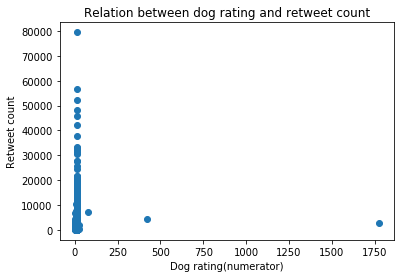

In [1503]:
x = twitter_archive_master.rating_numerator
y = twitter_archive_master.retweet_count
plt.scatter(x,y)
plt.xlabel('Dog rating(numerator)')
plt.ylabel('Retweet count')
plt.title('Relation between dog rating and retweet count');
plt.show()

**Visual doesn't show useful information due to outliers**. To remove outliers, will plot only a subset of the dataset.

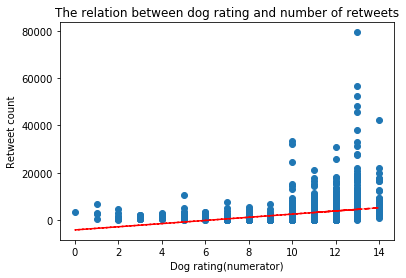

In [1504]:
data_subset = twitter_archive_master[twitter_archive_master.rating_numerator<15]

x = data_subset.rating_numerator
y = data_subset.retweet_count

plt.scatter(x,y)

#Next, will create a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")

plt.xlabel('Dog rating(numerator)')
plt.ylabel('Retweet count')
plt.title('The relation between dog rating and number of retweets');
plt.show()

***Insight-4:*** There seems to be a general positive relationship(although maybe not so strong) between dog rating and number of retweets

- Will repeat the same process but with favorite count instead!
- Will **improve on visualization** by taking average favorite_count for each rating.
    - Also, since I'll use the average, will check the single 0 rating if it adds value or to be removed

In [1505]:
twitter_archive_master[twitter_archive_master.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,short_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
209,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,https://t.co/YbEJPkg4Ag,...,0.967066,False,American_staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3443,24574


- Checking the URL, the tweet doesn't seem to be rating the dog itself which suggest that the tweet may need to be removed. For now, will just remove it from analysis

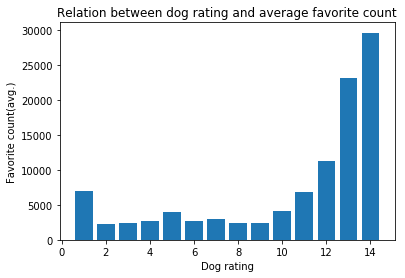

In [1506]:
favorite_subset = data_subset.groupby(['rating_numerator']).mean()['favorite_count']
x = favorite_subset.index[1: ] #[1: ] to remove 0 entry
y = favorite_subset.values[1: ] #[1: ] to remove 0 entry
plt.bar(x, y)

plt.xlabel('Dog rating')
plt.ylabel('Favorite count(avg.)')
plt.title('Relation between dog rating and average favorite count');

plt.show();

***Insight-5:*** It may be argued that there is a general tendancy for favorite count to increase (on average) with dog rating. It's important to stress that this is just a general tendancy and we can't draw definite conclusions from it yet.

- Finally, will investigate the relationship between favorite & retweet counts 


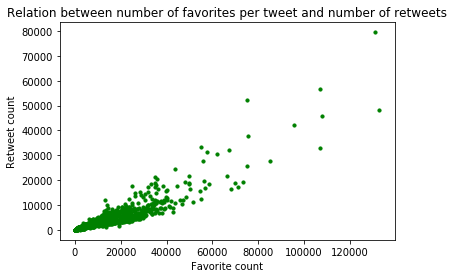

In [1507]:
x = twitter_archive_master.favorite_count
y = twitter_archive_master.retweet_count
plt.scatter(x,y, s=10, color='g')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
plt.title('Relation between number of favorites per tweet and number of retweets');
plt.show()

***Insight-6:*** there seems to be a strong positive correlation between favorite & retweet counts!

<a id='limitations'></a>
### Limitations
- One clear limitation is that the cleaning process never seem complete. Many new issues arise while cleaning old ones. To the extent that I had to prioritize the main issues in my opinion

- The second limitation is that I believe that the cleaning process ***(Define, Code, Clean)*** is **not mechanical**. **For example**: While **Coding**, I may have to **Test** some side issues to make sure I'm on the right track, rather than waiting to test everything at the end.

<a id='resources'></a>
### Resources
- Dog stages overiview: https://www.rover.com/blog/uk/do-you-speak-doggolingo-dog-internet-jargon-explained/    
- Stack Overflow
- Udacity QA Platform